# Data visualization using **Plotly**

`plotly.py` is an interactive, open-source, and browser-based graphing library for Python 

Online documentation: https://plotly.com/python/

* Plotly produces interactive graphs. The graphs are stored in JavaScript Object Notation (JSON) data format.
* *The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.*
(https://plotly.com/python/getting-started/)
* Plotly is a technical computing company headquartered in Montreal. The company develops data analytics and visualisation tools such as Dash and Chart Studio, and open source graphing API libraries for Python, R, MATLAB, Javascript and other programming languages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Import Plotly

In [2]:
#Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.
import plotly.express as px

# Functions in plotly.graph_objs module generate graph objects
import plotly.graph_objects as go

**Displaying figures**

*In many contexts, an appropriate renderer will be chosen automatically and you will not need to perform any additional configuration.* 

https://plotly.com/python/renderers/

In [3]:
import chart_studio.plotly as py
# https://github.com/santosjorge/cufflinks
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#  to display the plot inside the notebook, we need to initiate plotly’s notebook mode  
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.io as pio
pio.renderers.default = "iframe"

## First Examples

In [4]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

**Writing the image to a file**

https://plotly.com/python/static-image-export/#write-image-file

In [5]:
fig.write_image("images/fig1.jpeg")

In [5]:
a = np.random.rand(50,4)
df = pd.DataFrame(a, columns=['A','B','C','D'])
df.head()

,A,B,C,D
0,0.716351,0.753256,0.444080,0.289323
1,0.179703,0.373705,0.921771,0.930177
2,0.932740,0.584800,0.754369,0.358996
3,0.503476,0.066983,0.204108,0.359781
4,0.115009,0.105887,0.930298,0.065229


<AxesSubplot:>

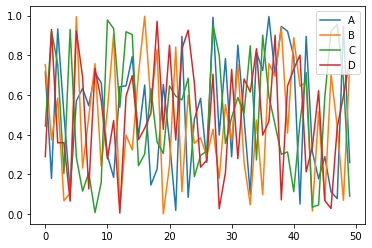

In [6]:
df.plot()

`iplot` works as well because `cufflinks` (https://github.com/santosjorge/cufflinks) is imported.

The `cufflinks` library *binds the power of plotly with the flexibility of pandas for easy plotting*.

In [7]:
df.iplot()

## Builtin datasets

https://plotly.com/python-api-reference/generated/plotly.express.data.html

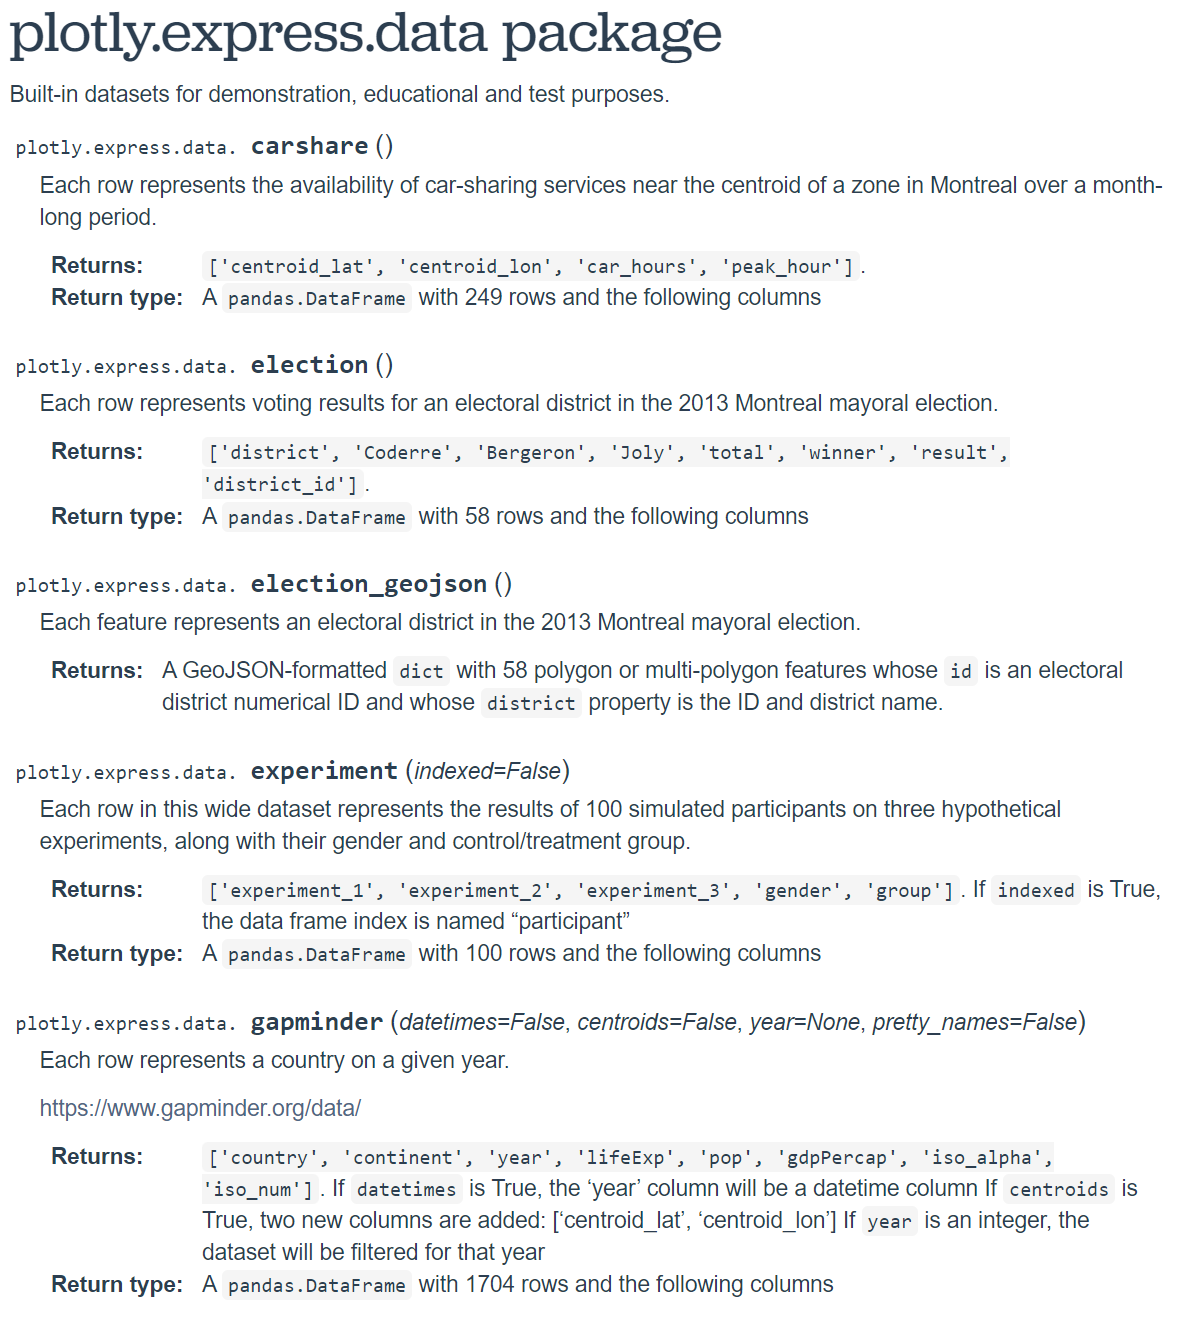

In [8]:
df_gapminder = px.data.gapminder()
df_gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [10]:
df_gapminder.shape

(1704, 8)

In [11]:
df_gapminder[df_gapminder.country=='Romania']

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1272,Romania,Europe,1952,61.050,16630000,3144.613186,ROU,642
1273,Romania,Europe,1957,64.100,17829327,3943.370225,ROU,642
1274,Romania,Europe,1962,66.800,18680721,4734.997586,ROU,642
1275,Romania,Europe,1967,66.800,19284814,6470.866545,ROU,642
1276,Romania,Europe,1972,69.210,20662648,8011.414402,ROU,642
1277,Romania,Europe,1977,69.460,21658597,9356.397240,ROU,642
1278,Romania,Europe,1982,69.660,22356726,9605.314053,ROU,642
1279,Romania,Europe,1987,69.530,22686371,9696.273295,ROU,642
1280,Romania,Europe,1992,69.360,22797027,6598.409903,ROU,642
1281,Romania,Europe,1997,69.720,22562458,7346.547557,ROU,642


## Line Charts

In [9]:
df_ro = df_gapminder.query("country=='Romania'")
fig = px.line(df_ro, x="year", y="lifeExp", title='Life expectancy in Romania')
fig.show()

In [11]:
df_o = df_gapminder.query("continent=='Oceania'")
fig = px.line(df_o, x="year", y="lifeExp", color='country')
fig.show()

In [12]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [13]:
px.line(df_stocks, x='date', y='GOOG', labels={'date': 'Date', 'GOOG': 'Price'})

Note:

`labels={'x': 'Date', 'y': 'Price'}`

vs.


`labels={'date': 'Date', 'GOOG': 'Price'}`

whereas below 'y' is a list with 2 elements...

In [14]:
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], labels={'date':'Date', 'value':'Price'}, title='Google vs. Apple')

Creating traces:
   * x = x axis
   * y = y axis
   * mode = type of plot like marker, line or line + markers
   * name = name of the plots
   * color = color of lines

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google', line=dict(color='black', width=2, dash='dashdot')))

fig.update_layout(title='Stock Price Data 2018-2020', xaxis_title='Price', yaxis_title='Date')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode='lines+markers', name='Google', line=dict(color='black', width=2, dash='dashdot')))

fig.update_layout(xaxis=dict(showline=True, showgrid=False, showticklabels=True, linecolor='rgb(204, 204, 204)', linewidth=2, ticks='outside', tickfont=dict(family='Arial', size=12, color='rgb(82, 82, 82)')),
                  yaxis=dict(showgrid=False, zeroline=False, showline=False, showticklabels=False),
                  autosize=False,
                  margin=dict(autoexpand=False, l=100, r=20, t=110),
                  showlegend=False,
                  plot_bgcolor='white')

In [17]:
iplot(fig)

## Bar Charts

In [18]:
df_ro = px.data.gapminder().query("country == 'Romania'")
px.bar(df_ro, x='year', y='pop', labels={'year':'Year', 'pop':'Population'})

In [19]:
# add color by lifeExp column 
fig = px.bar(df_ro, x='year', y='pop', color='lifeExp', labels={'pop': 'Population of Romania'}, height=400)
fig.show() 

In [20]:
df_europe = px.data.gapminder().query('continent == "Europe" and year == 2007 and pop> 2.e6')
df_europe.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820,BGR,100


In [21]:
fig = px.bar(df_europe, y = 'pop', x= 'country', text='pop', color='country')
fig

In [22]:
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig

In [23]:
df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
px.bar(df_tips, x='day', y='tip')

The bar for 'Sun'in this case shows the total amount of tips given on all Sundays...

In [25]:
df_tips.loc[df_tips['day'] == 'Sun', 'tip'].sum()

247.39000000000001

In [26]:
px.bar(df_tips, x='day', y='tip', color='sex', title='Tips by Sex on Each Day', labels={'tip':'Tip Amount', 'day': 'Day of the Week'})

In [27]:
px.bar(df_tips, x='sex', y='total_bill', color='smoker', barmode='group')

**<p style="color:red">EXERCISE 1</p>**

Create line and bar plotly charts for the IRIS dataset available in plotly.

* Load the dataset and check the data.
* Both line and bar charts should attempt to display the sepal length in function of petal length for the 3 iris species in the dataset.

In [30]:
# Your solution here...



## Scatter Plots

In [28]:
N = 100
x_vals = np.linspace(0, 1, N)
y1 = np.random.randn(N) + 5
y2 = np.random.randn(N)
y3 = np.random.randn(N) - 5
trace0 = go.Scatter(x = x_vals, y = y1,
                    mode = 'markers',
                    name = 'markers'
)
trace1 = go.Scatter(x = x_vals, y = y2,
                    mode = 'lines+markers',
                    name = 'line+markers'
)
trace2 = go.Scatter(x = x_vals,y = y3,
                    mode = 'lines',
                    name = 'line'
)
data = [trace0, trace1, trace2]
fig = go.Figure(data = data)
iplot(fig)

In [29]:
df_iris = px.data.iris()
px.scatter(df_iris, x='petal_length', y='sepal_length')

In [30]:
px.scatter(df_iris, x='sepal_width', y='sepal_length')

In [31]:
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species')

In [32]:
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_data=['petal_width'])

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_iris.sepal_width, 
                         y=df_iris.sepal_length,
                         mode='markers',
                         marker_color=df_iris.sepal_width,
                         text=df_iris.species,
                         marker=dict(showscale=True)))

fig.update_traces(marker_line_width=2, marker_size=10)

Scatter Plots for the gapminder dataset

In [34]:
# Plot Life Expectency vs GDP Per Capita for the year 2007
df_gapminder2007 = df_gapminder.query('year == 2007')

# create scatter plot 
fig = px.scatter(df_gapminder2007, x='gdpPercap', y='lifeExp')
fig.show() 

In [35]:
# color by continent 
fig = px.scatter(df_gapminder2007, x='gdpPercap', y='lifeExp', color='continent')
fig.show() 

In [36]:
# hover name 
fig = px.scatter(df_gapminder2007, x='gdpPercap', y='lifeExp', color='continent', 
                 size='pop', size_max=60, 
                 hover_name='country')
fig.show() 

In [37]:
# create a facet plot 
fig = px.scatter(df_gapminder, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=60, 
                hover_name='country', facet_col='continent')
fig.show() 

In [38]:
# add animation 
fig = px.scatter(df_gapminder, x='gdpPercap', y='lifeExp', color='continent', size='pop', size_max=40,
                 hover_name='country', log_x=True, 
                 animation_frame='year', animation_group='country', 
                 range_x=[25, 10000], range_y=[25,90])
fig.show()

**Plotly:** you can implement WebGL with `Scattergl()` in place of Scatter() for increased speed, improved interactivity, and the ability to plot even more data. 

**WebGL (Web Graphics Library)** is a JavaScript API for rendering interactive 2D and 3D graphics within any compatible web browser without the use of plug-ins (https://en.wikipedia.org/wiki/WebGL). WebGL is fully integrated with other web standards, allowing Graphics Processing Unit (GPU) accelerated usage of image processing.

In [39]:
fig = go.Figure(data=go.Scattergl(x=np.random.randn(100000),
                                  y=np.random.randn(100000),
                                  mode='markers',
                                  marker=dict(color=np.random.randn(100000), colorscale='reds', showscale=True),
                                  line_width=1))
fig

**<p style="color:red">EXERCISE 2</p>**

Create various scatter plots charts for the TIPS dataset available in plotly.

* Load the dataset and check the data.
* Explore the dataset using scatter plots.
* Try all of the above exemplified features.

In [43]:
# Your solution here...



## Pie Charts

In [40]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'yellow']
fig = go.Figure(data=[go.Pie(labels=['Water', 'Grass', 'normal', 'sand', 'fire', 'ground'], 
                             values=[110, 90, 80, 70, 60])])
fig.show()

In [41]:
fig.update_traces(hoverinfo='label+percent',
                 textfont_size=20,
                 textinfo='label+percent',
                 pull=[0.1, 0, 0.2, 0, 0, 0],
                 marker=dict(colors=colors, line=dict(color='white', width=2)))
fig

In [42]:
df_europe = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
#df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df_europe, values='pop', names='country', title='Population of European continent')
fig.show()

In [43]:
fig.update_traces(textinfo='none')
fig

In [44]:
# Example from: https://www.tutorialspoint.com/plotly/plotly_bar_and_pie_chart.htm
parties = ['BJP', 'CONGRESS', 'DMK', 'TMC', 'YSRC', 'SS', 'JDU','BJD', 'BSP','OTH']
seats = [303,52,23,22,22,18,16,12,10, 65]
percent = [37.36, 19.49, 2.26, 4.07, 2.53, 2.10, 1.46, 1.66, 3.63, 25.44]
import plotly.graph_objs as go
data1 = {
   "values": seats,
   "labels": parties,
   "domain": {"column": 0},
   "name": "seats",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data2 = {
   "values": percent,
   "labels": parties,
   "domain": {"column": 1},
   "name": "vote share",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data = [data1,data2]
layout = go.Layout(
   {
      "title":"Parliamentary Election 2019",
      "grid": {"rows": 1, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "seats",
            "x": 0.20,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "votes",
            "x": 0.8,
            "y": 0.5
         }
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Histograms

In [45]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2

fig = px.histogram(dice_sum, nbins=11, 
                  labels={'value':'Dice Roll'},
                  title='5000 Dice Roll Histogram',
                  marginal='violin',
                  color_discrete_sequence=['green'])
fig

In [46]:
fig.update_layout(xaxis_title_text='Dice Roll',
                 yaxis_title_text='Dice Sum',
                  showlegend=False,
                  bargap=0.2)
fig

In [47]:
df_tips = px.data.tips()
fig=px.histogram(df_tips, x='total_bill', color='sex')
fig

## Box Plots

In [48]:
trace1 = go.Box(y=[1140,1460,489,594,502,508,370,200])
data = [trace1]
fig = go.Figure(data)
iplot(fig)

In [49]:
trc = go.Box(y = [0.75, 5.25, 5.5, 6, 6.2, 6.6, 6.80, 7.0, 7.2, 7.5, 7.5, 7.75, 8.15,
                  8.15, 8.65, 8.93, 9.2, 9.5, 10, 10.25, 11.5, 12, 16, 20.90, 22.3, 23.25],
             boxpoints = 'suspectedoutliers', boxmean = 'sd')
data = [trc]
fig = go.Figure(data)
iplot(fig)

In [50]:
df_tips = px.data.tips()
px.box(df_tips, x='sex', y='tip')

In [51]:
px.box(df_tips, x='sex', y='tip', points='all')

In [52]:
px.box(df_tips, x='day', y ='tip', color='sex')

In [53]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, 
                     marker_color='blue',
                     boxmean='sd'))

In [54]:
df_stocks = px.data.stocks()
fig = go.Figure()

fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all', 
                     fillcolor='blue', jitter=0.5,
                     whiskerwidth=0.2))

fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all', 
                     fillcolor='red', jitter=0.5,
                     whiskerwidth=0.2))

fig.update_layout(title='Google vs. Apple',
                 yaxis=dict(gridcolor='rgb(255, 255, 255)',
                           gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')
fig

## Violin Plots

In [55]:
c1 = np.random.normal(100, 10, 200)
c2 = np.random.normal(80, 30, 200)

trace1 = go.Violin(y = c1, meanline_visible = True)
trace2 = go.Violin(y = c2, box_visible = True)

data = [trace1, trace2]
fig = go.Figure(data = data)
iplot(fig)

In [56]:
df_tips = px.data.tips()
px.violin(df_tips, y='total_bill', box=True, points='all')

In [57]:
px.violin(df_tips, y='tip', x='smoker', color='sex', box=True, points='all')

## Heatmaps

In [58]:
# https://www.tutorialspoint.com/plotly/plotly_heatmap.htm
vegetables = ["cucumber", "tomato", "lettuce", "asparagus","potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening", "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
trace = go.Heatmap(x = vegetables, y = farmers, z = harvest,
                   type = 'heatmap',
                   colorscale = 'Viridis')
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

In [59]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [60]:
fig = px.density_heatmap(flights, x='year', y='month', 
                        z='passengers',
                        color_continuous_scale='Viridis')
fig

In [61]:
fig = px.density_heatmap(flights, x='year', y='month', 
                        z='passengers',                        
                        marginal_x='histogram',
                        marginal_y='histogram')
fig

## 3D Plots

In [62]:
# 3D Line Plots
#flights = sns.load_dataset("flights")
fig = px.line_3d(flights, x='year', y='month', z='passengers', color='year')
fig

In [63]:
# 3D Scatter Plots
#flights = sns.load_dataset("flights")
fig = px.scatter_3d(flights, x='year', y='month', z='passengers', color='year', opacity=0.7)
fig

## Animated Maps

In [64]:
df_gapminder2007 = df_gapminder.query('year == 2007')

fig = px.line_geo(df_gapminder2007, locations='iso_alpha', color='continent', projection='orthographic')
fig.show() 

In [65]:
fig = px.scatter_geo(df_gapminder2007, locations = 'iso_alpha',
                    color = 'continent',
                    hover_name = 'country',
                    size = 'pop',
                    projection='orthographic')

fig

In [66]:
# create a map using choropleth
fig = px.choropleth(df_gapminder, locations='iso_alpha', color='lifeExp', hover_name='country', 
                    animation_frame='year', color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
fig.show() 

## Polar Charts

In [67]:
df_wind = px.data.wind()
df_wind.head()

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4


In [68]:
px.scatter_polar(df_wind, r='frequency', theta='direction',
                color="strength", size='frequency', symbol='strength')

In [69]:
px.line_polar(df_wind, r='frequency', theta='direction',
                color="strength", line_close=True, template='plotly_dark')

C:\Users\cchir\AppData\Roaming\Python\Python38\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cchir\AppData\Roaming\Python\Python38\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cchir\AppData\Roaming\Python\Python38\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cchir\AppData\Roaming\Python\Python38\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cchir\AppData\Roaming\Python\Python38\site-packages\plotly\express\_core.py:271: FutureWarn

## Ternary Plots

In [70]:
df_exp = px.data.experiment()
px.scatter_ternary(df_exp, a="experiment_1", b="experiment_2", c="experiment_3",
                  hover_name='group', color='gender')

## Facet Plots

In [71]:
df_tips = px.data.tips()
px.scatter(df_tips, x='total_bill', y='tip', color='smoker', facet_col='sex')

In [72]:
df_tips.shape

(244, 7)

In [77]:
set(df_tips['day'])

{'Fri', 'Sat', 'Sun', 'Thur'}

In [78]:
set(df_tips['time'])

{'Dinner', 'Lunch'}

In [79]:
px.histogram(df_tips, x='total_bill', y='tip', color='sex', facet_row='time', facet_col='day', category_orders={'day':['Thur', 'Fri', 'Sun'], 'time':['Lunch', 'Dinner']})

In [73]:
df_attention = sns.load_dataset('attention')
df_attention.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [81]:
df_attention.shape

(60, 5)

In [82]:
set(df_attention['attention'])

{'divided', 'focused'}

In [83]:
df_attention[df_attention['subject'] == 16]

,Unnamed: 0,subject,attention,solutions,score
15,15,16,focused,1,6.0
35,35,16,focused,2,8.0
55,55,16,focused,3,7.0


In [74]:
fig = px.line(df_attention, x='solutions', y='score', facet_col='subject', 
             facet_col_wrap=5, title='Scores based on attention')
fig

**<p style="color:red">EXERCISE 3</p>**

Create various animated plots to visualize the GAPMINDER dataset available in plotly.

* Load the dataset and check the data.
* Explore the dataset using bar charts, scatter plots, animated maps, etc.
* Try to produce the most useful visualizations for this dataset (for example, check how the life exp depends on gdp per capita; or how the population is increasing each year per continent).

In [85]:
# Your solution here...



## Other tutorial examples

https://www.kaggle.com/code/jhossain/explore-the-gapminder-dataset-with-plotly-express

https://www.kaggle.com/code/kanncaa1/plotly-tutorial-for-beginners

https://www.tutorialspoint.com/plotly/index.htm